In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp

In [73]:
dataset = 'Dataset/diabetes.csv'
df = pd.read_csv(dataset)

In [74]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

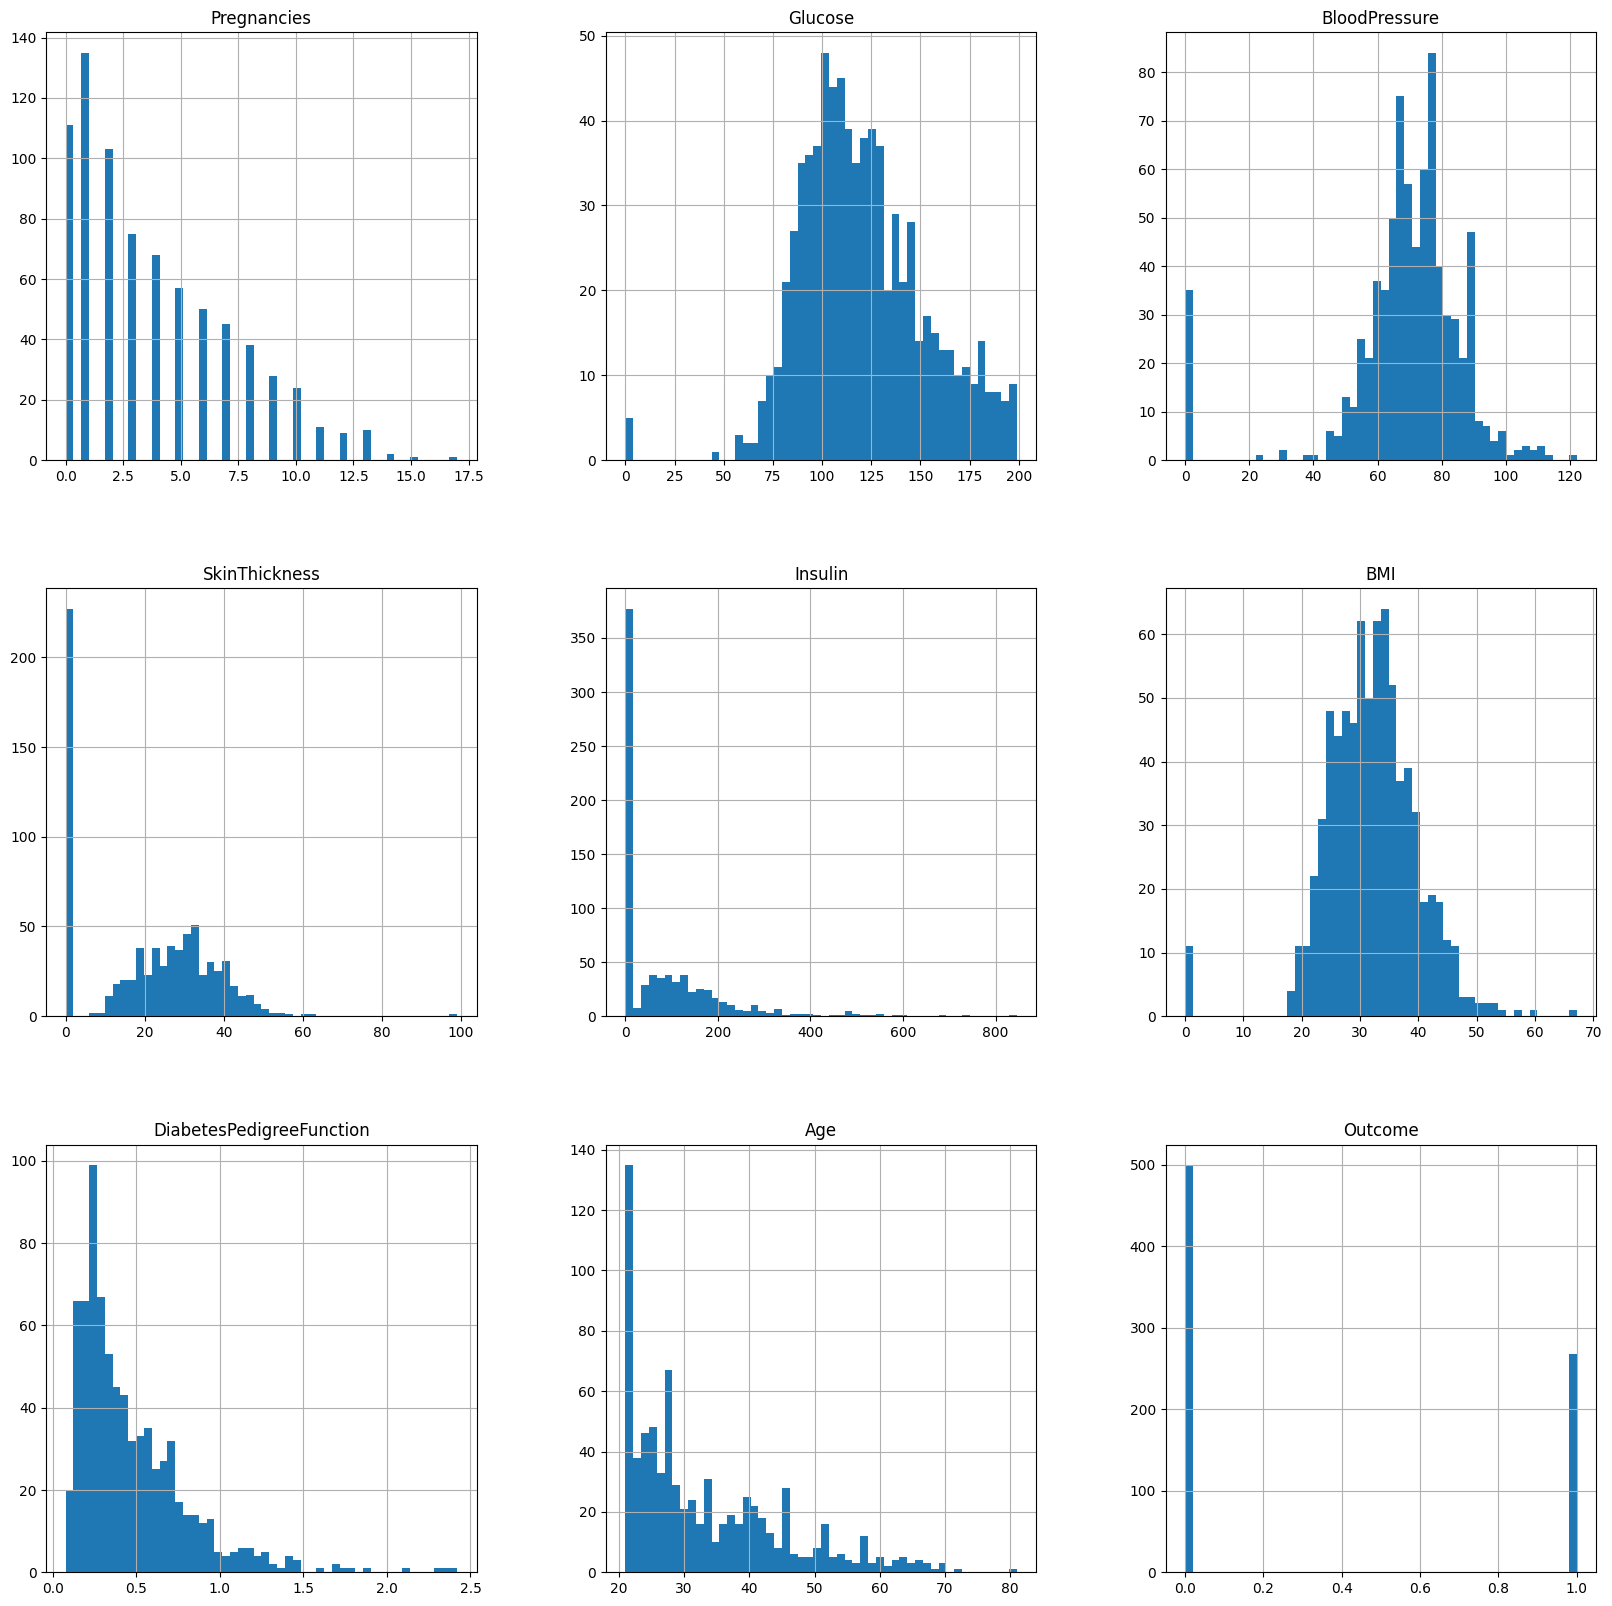

In [6]:
df.hist(bins = 50, figsize=(20, 20))
plt.show()

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

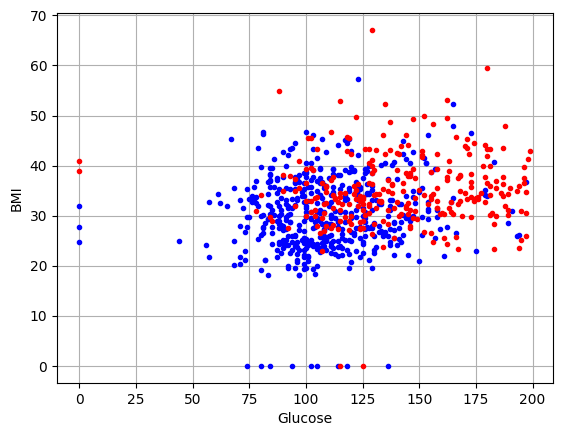

In [8]:
f1 = 'Glucose'
f2 = 'BMI'

plt.plot(df[df['Outcome'] == 0][f1], df[df['Outcome'] == 0][f2], 'b.')
plt.plot(df[df['Outcome'] == 1][f1], df[df['Outcome'] == 1][f2], 'r.')

plt.xlabel(f1)
plt.ylabel(f2)
plt.grid()

In [9]:
profile = pp.ProfileReport(
    df, title="Data", html={"style": {"full_width": True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
corr_matrix = df.corr()

In [12]:
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

# Preprocessing

In [77]:
miss_df = df[['BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness']]
miss_df

BMI  Glucose  BloodPressure  Insulin  SkinThickness
0    33.6      148             72        0             35
1    26.6       85             66        0             29
2    23.3      183             64        0              0
3    28.1       89             66       94             23
4    43.1      137             40      168             35
..    ...      ...            ...      ...            ...
763  32.9      101             76      180             48
764  36.8      122             70        0             27
765  26.2      121             72      112             23
766  30.1      126             60        0              0
767  30.4       93             70        0             31

[768 rows x 5 columns]

In [78]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=0)
p_df = imputer.fit_transform(miss_df)

In [79]:
p_df

array([[ 33.6       , 148.        ,  72.        , 155.54822335,
         35.        ],
       [ 26.6       ,  85.        ,  66.        , 155.54822335,
         29.        ],
       [ 23.3       , 183.        ,  64.        , 155.54822335,
         29.15341959],
       ...,
       [ 26.2       , 121.        ,  72.        , 112.        ,
         23.        ],
       [ 30.1       , 126.        ,  60.        , 155.54822335,
         29.15341959],
       [ 30.4       ,  93.        ,  70.        , 155.54822335,
         31.        ]])

In [80]:
miss_df = pd.DataFrame(p_df, columns=miss_df.columns, index=miss_df.index)

In [81]:
miss_df

BMI  Glucose  BloodPressure     Insulin  SkinThickness
0    33.6    148.0           72.0  155.548223       35.00000
1    26.6     85.0           66.0  155.548223       29.00000
2    23.3    183.0           64.0  155.548223       29.15342
3    28.1     89.0           66.0   94.000000       23.00000
4    43.1    137.0           40.0  168.000000       35.00000
..    ...      ...            ...         ...            ...
763  32.9    101.0           76.0  180.000000       48.00000
764  36.8    122.0           70.0  155.548223       27.00000
765  26.2    121.0           72.0  112.000000       23.00000
766  30.1    126.0           60.0  155.548223       29.15342
767  30.4     93.0           70.0  155.548223       31.00000

[768 rows x 5 columns]

In [82]:
miss_df[miss_df['BloodPressure'] == 0]

Empty DataFrame
Columns: [BMI, Glucose, BloodPressure, Insulin, SkinThickness]
Index: []

In [83]:
df = df.drop(['BMI', 'Glucose', 'BloodPressure', 'Insulin', 'SkinThickness'], axis=1)
df

Pregnancies  DiabetesPedigreeFunction  Age  Outcome
0              6                     0.627   50        1
1              1                     0.351   31        0
2              8                     0.672   32        1
3              1                     0.167   21        0
4              0                     2.288   33        1
..           ...                       ...  ...      ...
763           10                     0.171   63        0
764            2                     0.340   27        0
765            5                     0.245   30        0
766            1                     0.349   47        1
767            1                     0.315   23        0

[768 rows x 4 columns]

In [84]:
train_df = pd.concat([miss_df, df], axis=1)
train_df

BMI  Glucose  BloodPressure     Insulin  SkinThickness  Pregnancies  \
0    33.6    148.0           72.0  155.548223       35.00000            6   
1    26.6     85.0           66.0  155.548223       29.00000            1   
2    23.3    183.0           64.0  155.548223       29.15342            8   
3    28.1     89.0           66.0   94.000000       23.00000            1   
4    43.1    137.0           40.0  168.000000       35.00000            0   
..    ...      ...            ...         ...            ...          ...   
763  32.9    101.0           76.0  180.000000       48.00000           10   
764  36.8    122.0           70.0  155.548223       27.00000            2   
765  26.2    121.0           72.0  112.000000       23.00000            5   
766  30.1    126.0           60.0  155.548223       29.15342            1   
767  30.4     93.0           70.0  155.548223       31.00000            1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [86]:
# profile = pp.ProfileReport(
#     train_df, title="trainData", html={"style": {"full_width": True}})
# profile

In [1]:
# corr_matrix = train_df.corr()
# corr_matrix['Outcome'].sort_values(ascending=False)

In [ ]:
y = np.array(train_df['Outcome'])
X = np.array(train_df.drop(['Outcome'], axis=1))
# X = np.array(train_df[['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin']])

In [134]:
X

array([[ 33.6  , 148.   ,  72.   , ...,   6.   ,   0.627,  50.   ],
       [ 26.6  ,  85.   ,  66.   , ...,   1.   ,   0.351,  31.   ],
       [ 23.3  , 183.   ,  64.   , ...,   8.   ,   0.672,  32.   ],
       ...,
       [ 26.2  , 121.   ,  72.   , ...,   5.   ,   0.245,  30.   ],
       [ 30.1  , 126.   ,  60.   , ...,   1.   ,   0.349,  47.   ],
       [ 30.4  ,  93.   ,  70.   , ...,   1.   ,   0.315,  23.   ]])

In [135]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [136]:
# def train_test_split(data, test_ratio):
#     shuffled_indices = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled_indices[:test_set_size]
#     train_indices = shuffled_indices[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

# train_set, test_set = train_test_split(df, 0.2)

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
X_train.shape

(614, 8)

In [139]:
X_test.shape

(154, 8)

In [140]:
# from sklearn.preprocessing import MinMaxScaler
# st =MinMaxScaler()
# X_train = st.fit_transform(X_train)
# X_test = st.fit_transform(X_test)

# LogisticRegression

In [146]:
clf = LogisticRegression()

clf.fit(X_train, y_train)

print('Train score\t', clf.score(X_train, y_train))
print('Valid score\t', clf.score(X_test, y_test))

h = clf.predict(X_test)
print('Precisoin\t', precision_score(y_test, h))
print('Recall  \t', recall_score(y_test, h))
print('F-1 score\t', f1_score(y_test, h))

Train score	 0.7719869706840391
Valid score	 0.7857142857142857
Precisoin	 0.7368421052631579
Recall  	 0.5490196078431373
F-1 score	 0.6292134831460675


C:\Users\thearshiya\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
